### let's get started by importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

##### - DATA TRANSFER USING PANDAS 

In [8]:
ship=pd.read_csv('titanic_train.csv')

In [10]:
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### EXPLORATORY DATA ANALYSIS

In [14]:
ship.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##### - we can create a heatborn to find null values

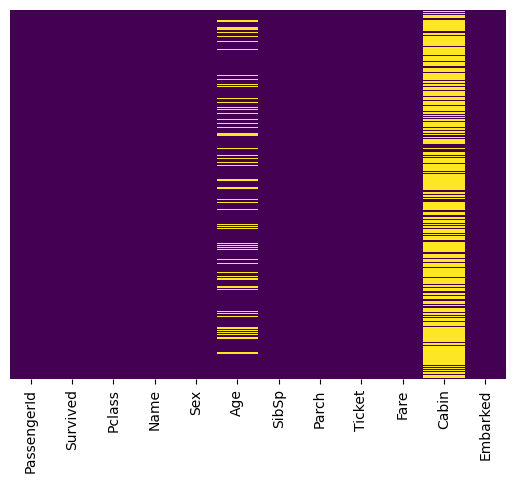

In [18]:
sns.heatmap(ship.isnull(), 
            yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### COUNTPLOT : TO SHOW HOW MANY SURVIVED?

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17396\4082495751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=ship, palette='rainbow')


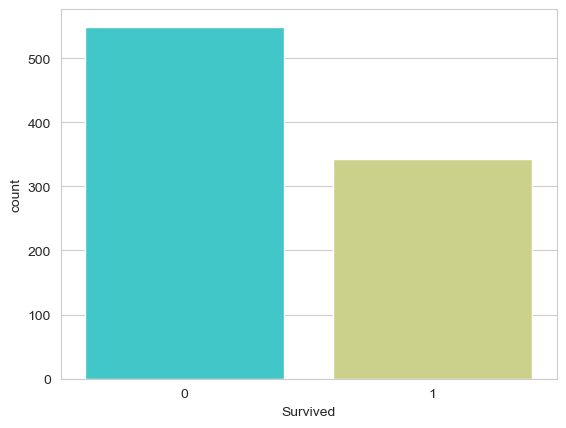

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=ship, palette='rainbow')
plt.show()

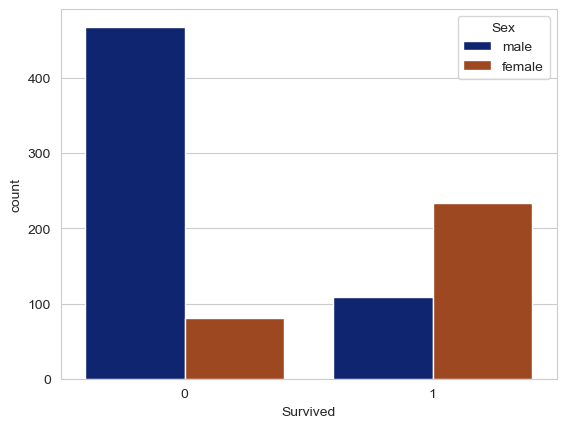

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Sex',data=ship, palette='dark')
plt.show()

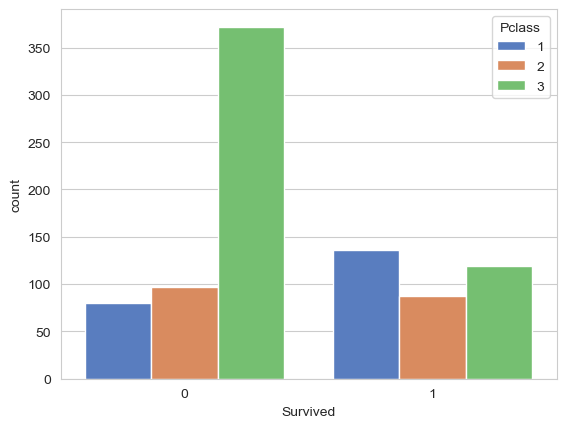

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue= 'Pclass',data=ship, palette='muted')
plt.show()

#### DISTPLOT TO SHOW AGE RANGE OF PASENGERS

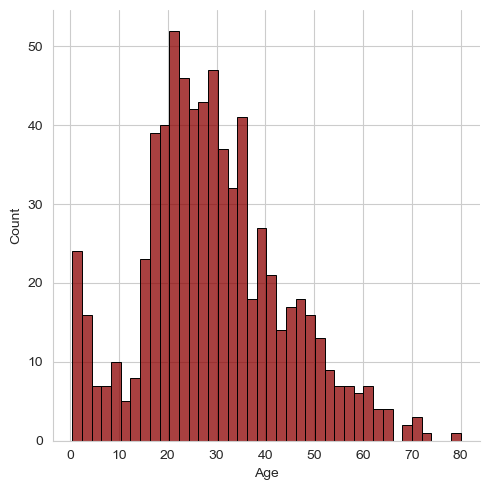

In [30]:
sns.displot(ship['Age'].dropna(),kde=False,color='darkred',edgecolor='black',bins=40)
plt.show()

### INTERPRETATION:
#### 1.The above graph shows that most of the passengers in Titanic are in the age group of (20-35)years, 
#### 2.It means many people are young who got onto the ship.

#### - sibling spouse count using countplot

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17396\2029228996.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=ship,palette='rainbow')


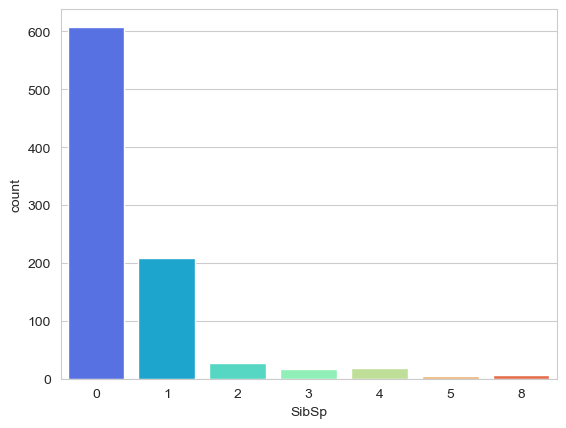

In [38]:
sns.countplot(x='SibSp',data=ship,palette='rainbow')
plt.show()

#### INTERPRETATION
#####  - it shows that most of the passengers either have no sibling and spouse or have one as a spouse/sibling.

#### ship fare

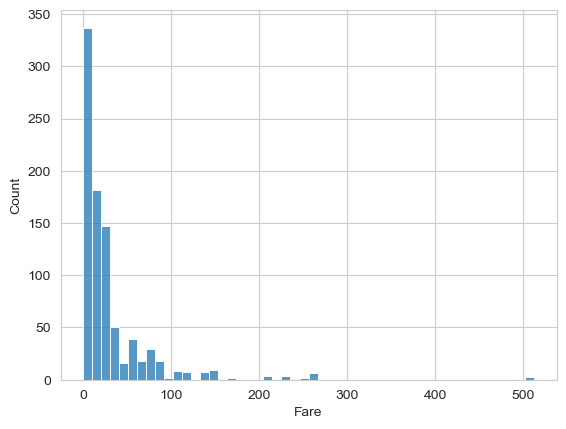

In [44]:
sns.histplot(x='Fare',data=ship,bins=50)
plt.show()


C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17396\1855829004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=ship,palette='winter')


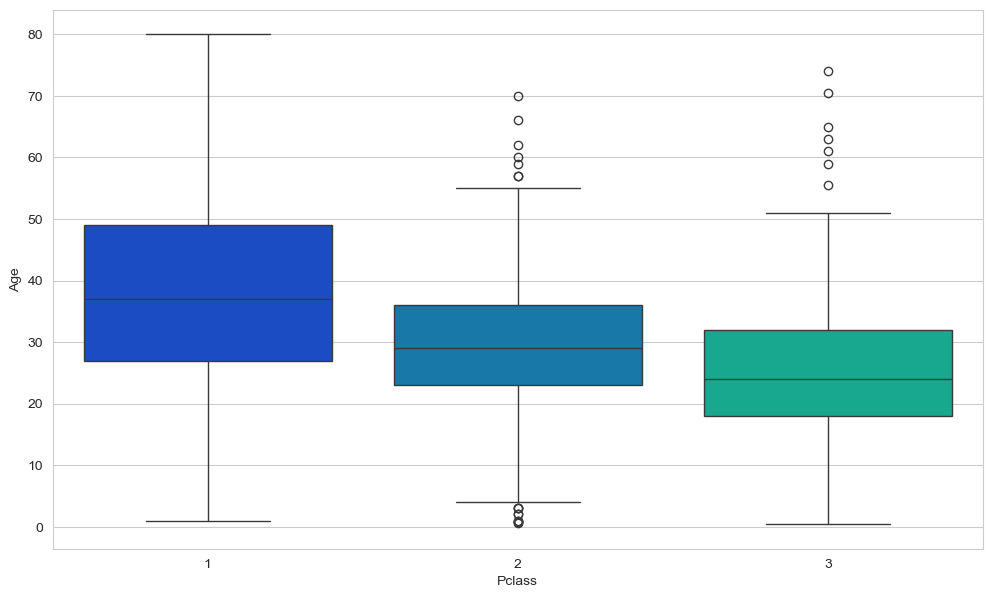

In [46]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=ship,palette='winter')
plt.show()


#### INTERPRETATION
##### - we can see that passenger in higher class(1) are older than passenger class 2 and 3 


 -Average age of different types of passenger classes

In [64]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
           return 37
        elif Pclass==2:
           return 29
        else:
           return 24
    else:
        return Age
    

### DATA CLEANING

In [68]:
ship['Age']=ship[['Age','Pclass']].apply(impute_Age,axis=1)

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17396\1267280576.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17396\1267280576.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


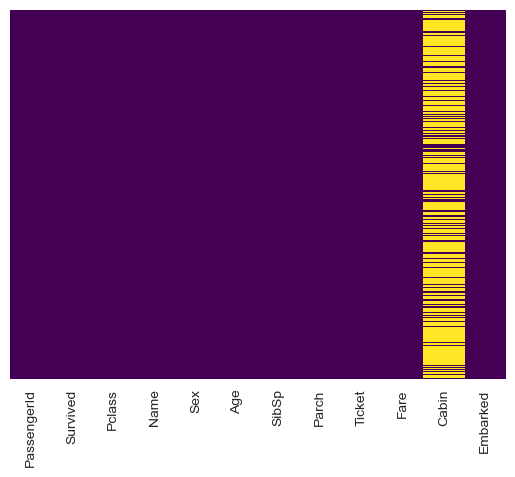

In [70]:
sns.heatmap(ship.isnull(), 
            yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [72]:
ship.drop('Cabin',axis=1,inplace=True)

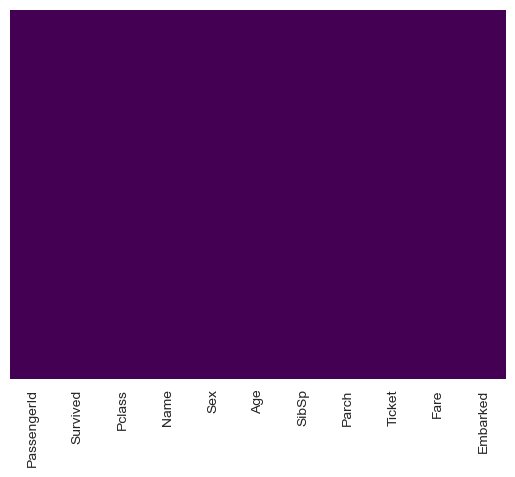

In [74]:
sns.heatmap(ship.isnull(), 
            yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [76]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [78]:
ship.dropna(inplace=True)

In [80]:
#CONVERTING CATEGORICAL FEATURES

In [82]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [86]:
pd.get_dummies(ship['Embarked'],drop_first=True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [92]:
sex = pd.get_dummies(ship['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(ship['Embarked'], drop_first=True).astype(int)


In [94]:
ship.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [96]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [98]:
ship=pd.concat([ship,sex,embark],axis=1)

In [100]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [104]:
#SHIP TEST SPLIT

In [108]:
ship.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [110]:
ship['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split


In [134]:
X_ship, X_test, y_ship, y_test = train_test_split(ship.drop('Survived',axis=1), 
                                                    ship['Survived'], test_size=0.30, 
                                                    random_state=101)


### TRAIN AND PREDICTING

In [138]:
from sklearn.linear_model import LogisticRegression


In [146]:
logmodel = LogisticRegression()
logmodel.fit(X_ship,y_ship)


C:\Users\Rashi Bali\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [150]:
predictions = logmodel.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix

In [154]:
accuracy=confusion_matrix(y_test,predictions)

In [158]:
accuracy



array([[149,  14],
       [ 39,  65]], dtype=int64)

In [160]:
from sklearn.metrics import accuracy_score


In [162]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8014981273408239

In [164]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

#### EVALUATION USING F1 SCORE

In [168]:
from sklearn.metrics import classification_report


In [170]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



### THANK YOU